# Symmetry between Dropout Strength and Number of Interaction Effects
Reproduces Figure 3 in the paper, showing that the effective learning rate $r_p(k)$ and the size of the hypothesis space $|\mathcal{H}_k|$ roughly cancel each other out.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.special import comb

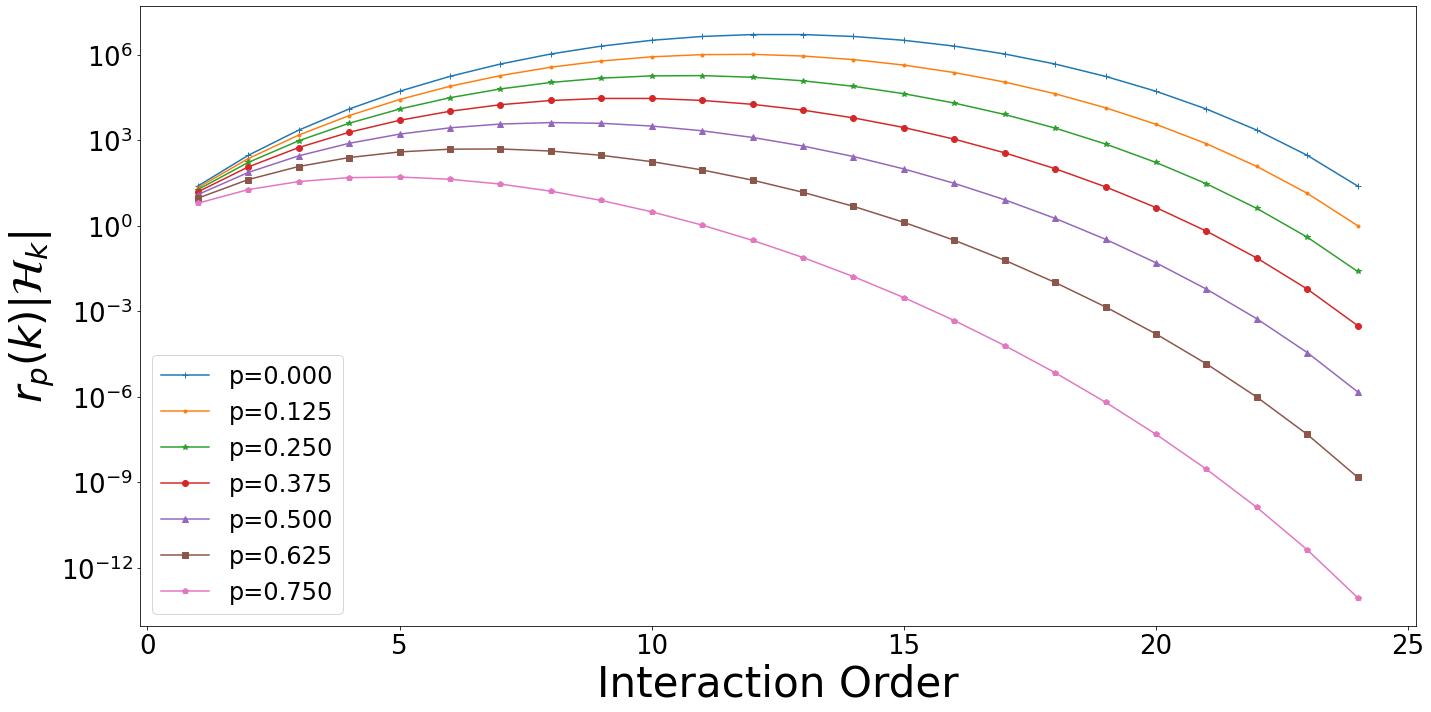

In [9]:
fig = plt.figure(figsize=(20, 10))
n_features = 25
orders = range(1, n_features)
n_intx = np.array([comb(n_features, k) for k in orders])
n_samples = 10000
markers = ['+', '.', '*', 'o', '^', 's', 'p']
for i, dropout_p in enumerate([0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75]):
    lrs = np.array([(1.-dropout_p)**k for k in orders])
    ess = np.array([n_samples*(0.5**(k-1)) for k in orders])
    plt.semilogy(orders, n_intx*lrs, label='p={:.3f}'.format(dropout_p), marker=markers[i])
plt.xlabel("Interaction Order", fontsize=42)
plt.ylabel("$r_p(k)|\mathcal{H}_k|$", fontsize=42)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(fontsize=24)
plt.tight_layout()
plt.savefig("results/hypothesis_space_full.pdf", dpi=300)

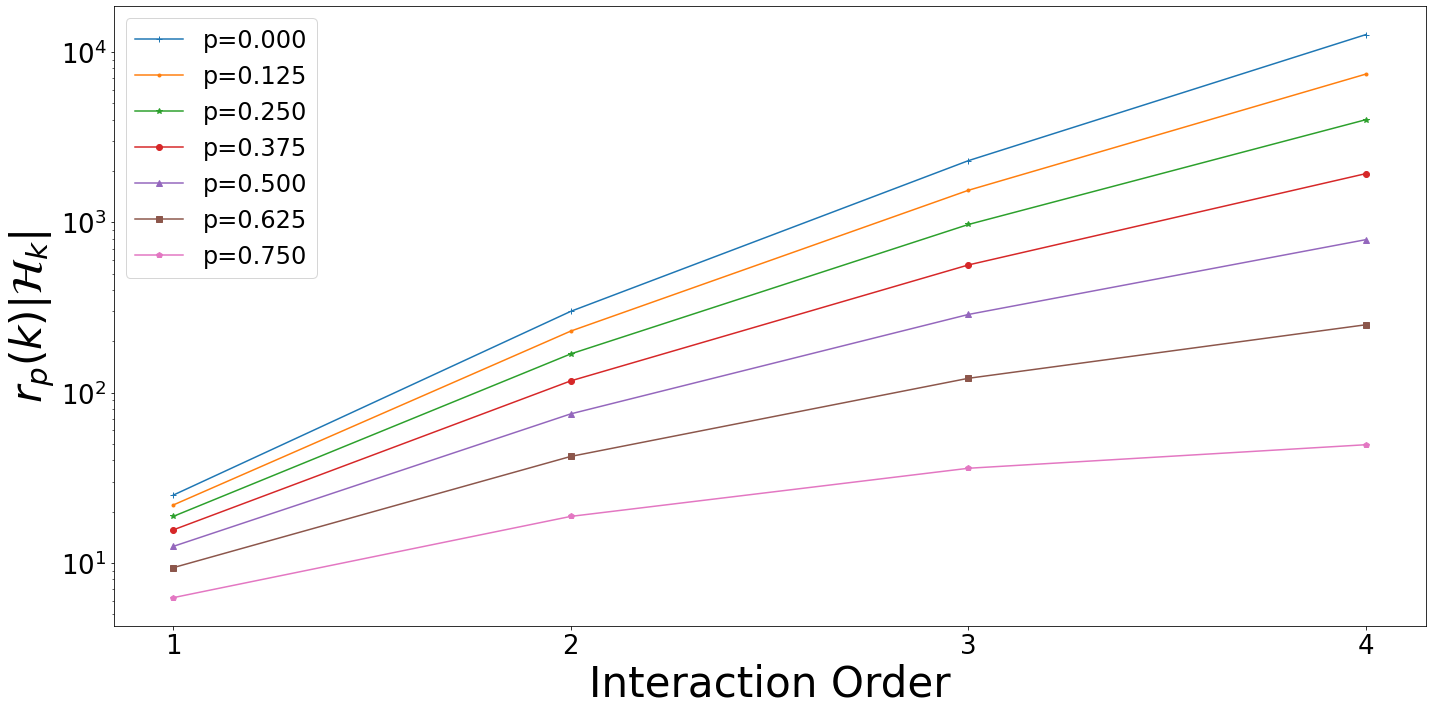

In [3]:
# Inset of 1-5 region.
fig = plt.figure(figsize=(20, 10))
n_features = 25
orders = range(1, 5)
n_intx = np.array([comb(n_features, k) for k in orders])
n_samples = 10000
markers = ['+', '.', '*', 'o', '^', 's', 'p']
for i, dropout_p in enumerate([0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75]):
    lrs = np.array([(1.-dropout_p)**k for k in orders])
    ess = np.array([n_samples*(0.5**(k-1)) for k in orders])
    plt.semilogy(orders, n_intx*lrs, label='p={:.3f}'.format(dropout_p), marker=markers[i])
plt.xlabel("Interaction Order", fontsize=42)
plt.ylabel("$r_p(k)|\mathcal{H}_k|$", fontsize=42)
#plt.
plt.xticks([1, 2, 3, 4], fontsize=26)
plt.yticks(fontsize=26)
plt.legend(fontsize=24)
plt.tight_layout()
plt.savefig("results/hypothesis_space_inset.pdf", dpi=300)